# Скорость
# dx трапеция

In [1]:
import math
import matplotlib.pyplot as plt
import numpy
import cv2
from IPython.display import Image

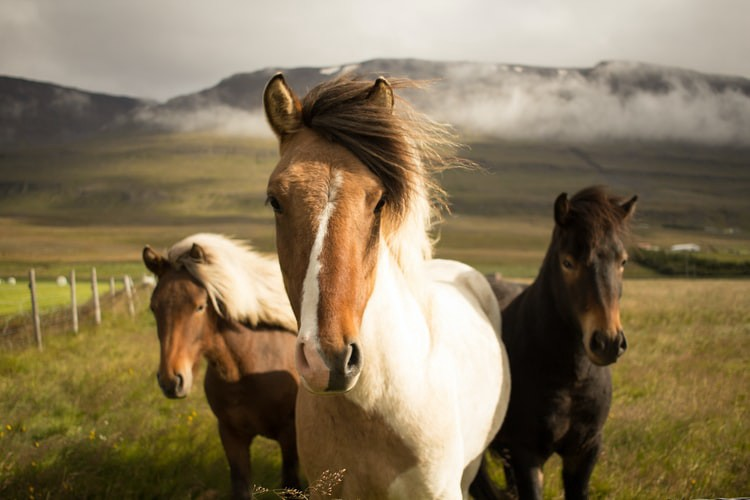

In [3]:
Image(filename='../jupyter/1.jpeg')

In [45]:
image = cv2.imread('../jupyter/Lenna.png')

In [51]:
def velocity(angle, peaks):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   peaks   - положения пиков интенсивности на гранях отверстий
    #   angle   - угол поворота в рад (по часовой +, против -)
    
    new_peaks = []      # повернутая система координат k - номер кадра, i - номер пика,
                        #   = координата пика
    dist = [[]]         # расстояния между пиками
    dx = 0              # сторона усеченной пирамиды
    
    for k in range(2): 
        dist.append()
        temp = []
        for i in range(3):
            temp.append((peaks[k][i][1]+peaks[k][i][0]/math.cos(angle))*(math.cos(angle)+math.sin(angle)*math.tan(angle))**(-1))
            try:
                dist[k][i] = temp[-1] - dist[k][i]
            except:
                pass
            dist[k].append(temp[-1])
        
        new_peaks.append(temp)

    #   проверка на потерю пика у края кадра
    if dist[0][0]>dist[1][0]:
        dx = new_peaks[0][1] - new_peaks[1][1]
    else:
        dx = new_peaks[0][0] - new_peaks[0][1]
    
    return dx # Кол-во пикселей

def trapezoid(frame, angle, dx):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   angle   - угол поворота в рад (по часовой +, против -)

    center_x = round(len(frame)/2-1)
    center_y = round(len(frame[0])/2-1)

    radius = min(center_y,center_x)
    rad_inner = radius-dx

    trap=[]
    #frame_copy = frame.copy()
    row = -1
    d_phi = 2*math.pi/abs(2*math.pi*center_y)
    
    while radius > rad_inner:
        
        trap.append([])
        row += 1
        phi = angle

        prev_px = []
        while phi < 2 * math.pi + angle:
            #prev_px = []
            #print(round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi)))
            next_px = [round(center_x+radius*math.cos(math.pi/2+phi)), round(center_y-radius*math.sin(math.pi/2+phi))]
            
            try:
                if prev_px != next_px:
                    #print(next_px[0],next_px[1])
                    trap[row].append(list(frame[next_px[0]][next_px[1]]))
            except:
                trap[row].append(list(frame[next_px[0]][next_px[1]]))
            
            # Новый круг
            prev_px = next_px.copy()
            phi += d_phi
            
        radius -= 1
        d_phi = 2*math.pi/(len(trap[row])-2)
    
    #print(trap)
    trap = fill(trap)
    
    return trap

def fill(arr):

    #del arr[0][0]
    max_len = len(arr[0])
    for row in range(1, len(arr)):
        #for col in range(len(arr[row], len(arr[0]))):
        #    arr[row].app
        arr[row] = [[0,0,0]] * int((max_len - len(arr[row]))/2) + arr[row] + [[0,0,0]] * int((max_len - len(arr[row])) / 2)
        if len(arr[row])!=max_len:
            arr[row].append([0,0,0]*(max_len - len(arr[row])))
    
    return arr


image2 = trapezoid(image, math.pi/6, 300)

In [52]:
#print(image2[0])

In [59]:
#image2 = (trapezoid(image, math.pi/6, 15))

KeyboardInterrupt: 

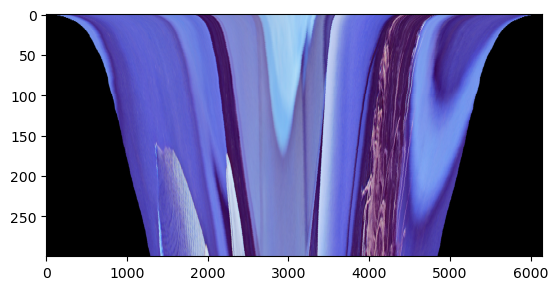

In [53]:
#for i in range(len(image2)):
#    for k in range(len(image2[i])):
#        if len(image2[i][k])!=3:
#            print(image2[i][k])
#            print(i, k)

#image2 = image2[...,::-1]
plt.imshow(image2, aspect=10)

In [190]:
#print(image2[0])

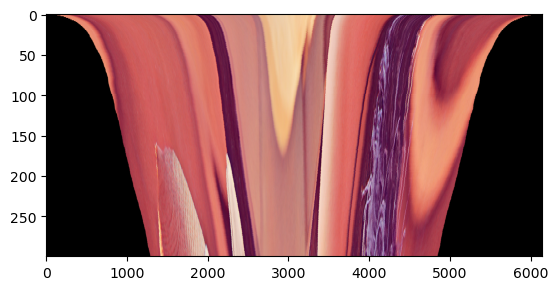

In [56]:
#image3=numpy.array([numpy.array(xi) for xi in image2])

def bgr_to_rgb(pixel):
    temp = [pixel[2],pixel[1],pixel[0]]
    return temp

for row in range(len(image2)):
    image2[row] = list(map(bgr_to_rgb, image2[row]))

def kostyl(arr):
    for row in range(len(arr)):
        arr[row] = list(map(bgr_to_rgb, arr[row]))

#print(image2[0])
#image3g = image3[...,::-1]
plt.imshow(image2, aspect=10)

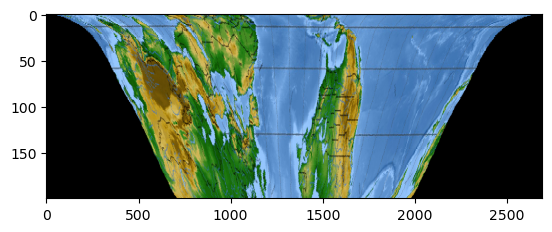

In [59]:
im_earth = cv2.imread('../jupyter/earth.jpg')
im_earth_edit = trapezoid(im_earth, 15, 200)
kostyl(im_earth_edit)
plt.imshow(im_earth_edit, aspect=5)